In [25]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [20]:
# Load dataset
path='./superstore_data.csv'
data = pd.read_csv(path)
data.shape # and data.head()

(2240, 22)

In [21]:
# Check missing values
missing_v = data.isnull().sum()
print(f"Missing values {missing_v}")
# Drop null values
data_dropped = data.dropna()
data_dropped.shape

Missing values Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


(2216, 22)

In [38]:
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

In [23]:
# impute missing values in numerical column with mean
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols]=imputer_num.fit_transform(data[numerical_cols])
# impute missing values in categorical column with mode (most present value)
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols]=imputer_cat.fit_transform(data[categorical_cols])

In [ ]:
missing_v = data_dropped.isnull().sum()
missing_v

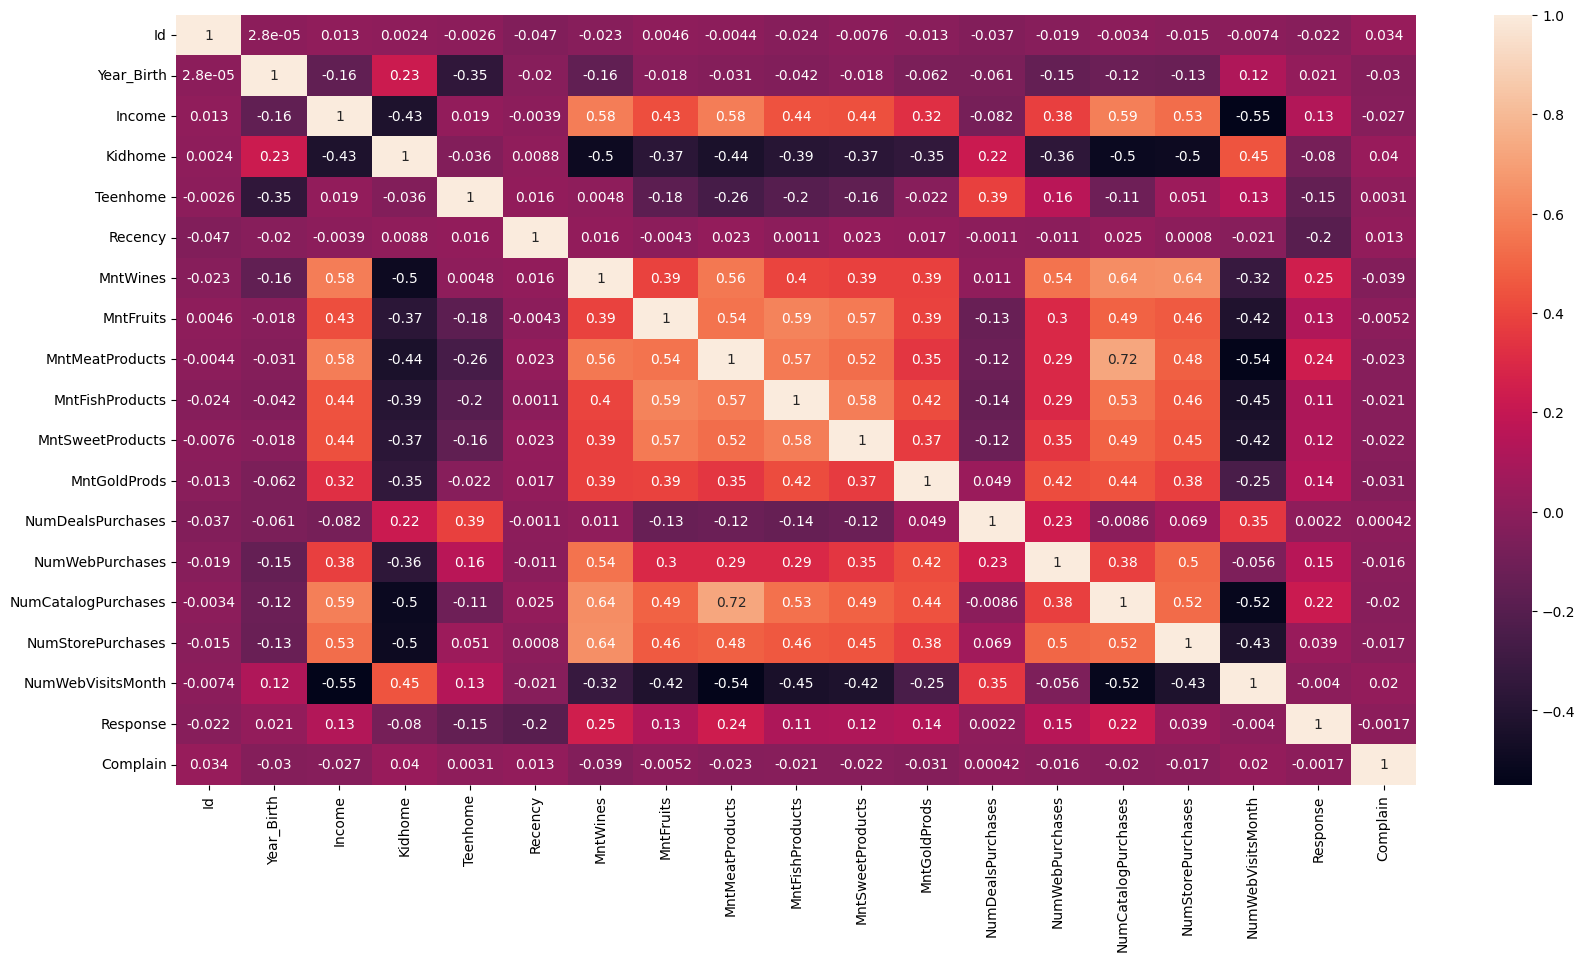

In [30]:
# Check correlations

corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr_matrix,annot=True)
plt.show()

In [33]:
threshold = 0.1
high_corr_features = corr_matrix.index[corr_matrix['Response'].abs() > threshold].tolist()
high_corr_features

['Income',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'Response']